# HR Analytics Employee Attrition & Performance
Uncover the factors that lead to employee attrition 
and explore important questions such as 
‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education 
and attrition’. This is a fictional data set created by IBM data scientists. Below are the corresponding valus for each column given:

Education

1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating

1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance

1 'Bad'
2 'Good'
3 'Better'
4 'Best'

# Exploratory Data Analysis

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
%matplotlib inline
sns.set()

In [178]:
emp = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [179]:
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [180]:
emp.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [181]:
emp.shape

(1470, 35)

In [182]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [183]:
emp.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [184]:
#Checking if the data contains any null values
emp.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [185]:
emp['Education'] = emp['Education'].replace({1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'})
emp['EnvironmentSatisfaction'] = emp['EnvironmentSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
emp['JobInvolvement'] = emp['JobInvolvement'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
emp['JobSatisfaction'] = emp['JobSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
emp['PerformanceRating'] = emp['PerformanceRating'].replace({1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'})
emp['RelationshipSatisfaction'] = emp['RelationshipSatisfaction'].replace({1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'})
emp['WorkLifeBalance'] = emp['WorkLifeBalance'].replace({1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'})

In [186]:
emp['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [187]:
emp['Education'].value_counts()

Bachelor         572
Master           398
College          282
Below College    170
Doctor            48
Name: Education, dtype: int64

In [188]:
emp['PerformanceRating'].value_counts()

Excellent      1244
Outstanding     226
Name: PerformanceRating, dtype: int64

In [189]:
emp['EnvironmentSatisfaction'].value_counts()

High         453
Very High    446
Medium       287
Low          284
Name: EnvironmentSatisfaction, dtype: int64

In [190]:
emp.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,...,Low,80,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,...,Very High,80,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,...,Medium,80,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,...,High,80,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,...,Very High,80,1,6,3,Better,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,College,Life Sciences,1,8,...,High,80,0,8,2,Good,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,Bachelor,Medical,1,10,...,Low,80,3,12,3,Good,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,Below College,Life Sciences,1,11,...,Medium,80,1,1,2,Better,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,Bachelor,Life Sciences,1,12,...,Medium,80,0,10,2,Better,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,Bachelor,Medical,1,13,...,Medium,80,2,17,3,Good,7,7,7,7


In [191]:
emp[['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']]

,EmployeeCount,EmployeeNumber,Over18,StandardHours
0,1,1,Y,80
1,1,2,Y,80
2,1,4,Y,80
3,1,5,Y,80
4,1,7,Y,80
...,...,...,...,...
1465,1,2061,Y,80
1466,1,2062,Y,80
1467,1,2064,Y,80
1468,1,2065,Y,80


In [192]:
#Dropping these 4 columns as these do not help in analyzing or predicting the attrition rate
emp.drop(columns = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis = 1, inplace = True)

In [193]:
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [194]:
emp.groupby('Department')['Attrition'].value_counts()

Department              Attrition
Human Resources         No            51
                        Yes           12
Research & Development  No           828
                        Yes          133
Sales                   No           354
                        Yes           92
Name: Attrition, dtype: int64

In [195]:
emp.groupby('Department')['JobSatisfaction'].value_counts()

Department              JobSatisfaction
Human Resources         Medium              20
                        Very High           17
                        High                15
                        Low                 11
Research & Development  High               300
                        Very High          295
                        Low                192
                        Medium             174
Sales                   Very High          147
                        High               127
                        Low                 86
                        Medium              86
Name: JobSatisfaction, dtype: int64

In [196]:
emp.groupby('OverTime')['Attrition'].value_counts()

OverTime  Attrition
No        No           944
          Yes          110
Yes       No           289
          Yes          127
Name: Attrition, dtype: int64

In [197]:
emp['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [198]:
emp.groupby('JobRole')['PercentSalaryHike'].mean()

JobRole
Healthcare Representative    15.450382
Human Resources              14.807692
Laboratory Technician        15.046332
Manager                      15.137255
Manufacturing Director       15.593103
Research Director            14.950000
Research Scientist           15.448630
Sales Executive              14.889571
Sales Representative         15.674699
Name: PercentSalaryHike, dtype: float64

In [199]:
emp['MonthlyIncome'].sort_values(ascending = False).head()

190    19999
746    19973
851    19943
165    19926
568    19859
Name: MonthlyIncome, dtype: int64

In [200]:
emp[(emp['NumCompaniesWorked'] > 2) & (emp['JobLevel'] >= 2)]['Attrition'].value_counts()

No     382
Yes     53
Name: Attrition, dtype: int64

# Data Visualization and Preprocessing

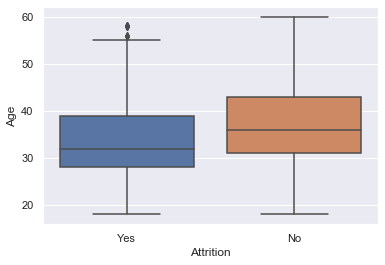

In [201]:
sns.boxplot(x = 'Attrition', y = 'Age', data = emp)

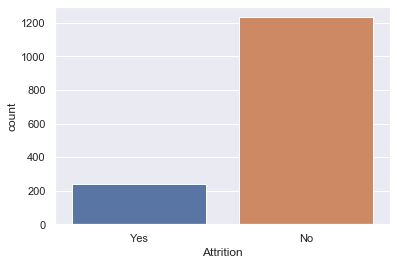

In [202]:
#We can see that the target variable 'Attrition' is quite unbalanced 
sns.countplot(x= 'Attrition', data = emp)

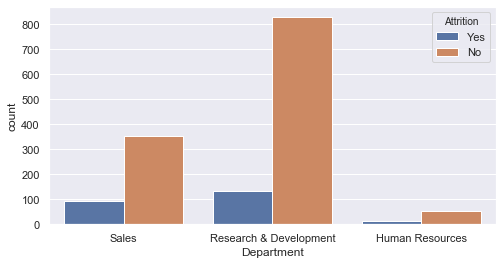

In [203]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'Department', data = emp, hue = 'Attrition')

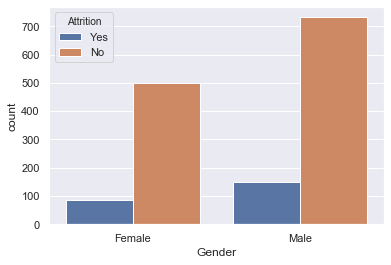

In [204]:
sns.countplot(x= 'Gender', data = emp, hue = 'Attrition')

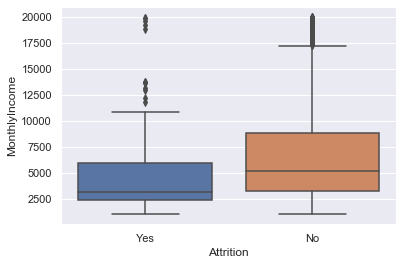

In [205]:
sns.boxplot(x = 'Attrition', y = 'MonthlyIncome', data = emp)

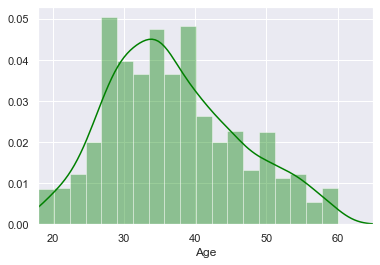

In [206]:
plt.xlim(18,65)
sns.distplot(emp['Age'], color = 'Green')

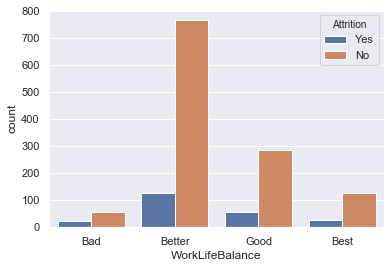

In [207]:
sns.countplot(x= 'WorkLifeBalance', data = emp, hue = 'Attrition')

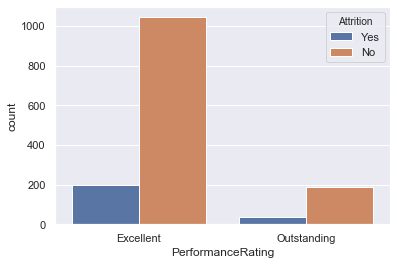

In [208]:
sns.countplot(x= 'PerformanceRating', data = emp, hue = 'Attrition')

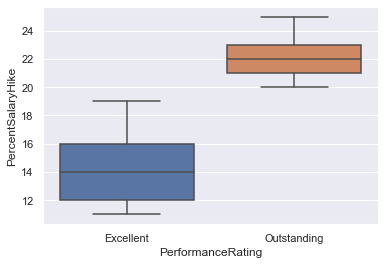

In [209]:
sns.boxplot(x = 'PerformanceRating', y = 'PercentSalaryHike', data = emp)

<Figure size 432x288 with 0 Axes>

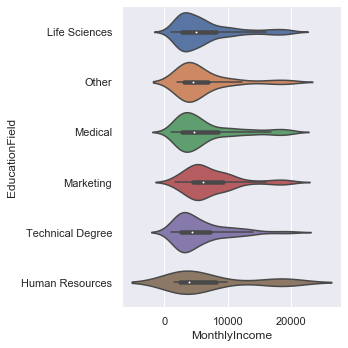

In [210]:
plt.tight_layout()
ax = sns.catplot(x = 'MonthlyIncome', y = 'EducationField', data = emp, kind = 'violin')

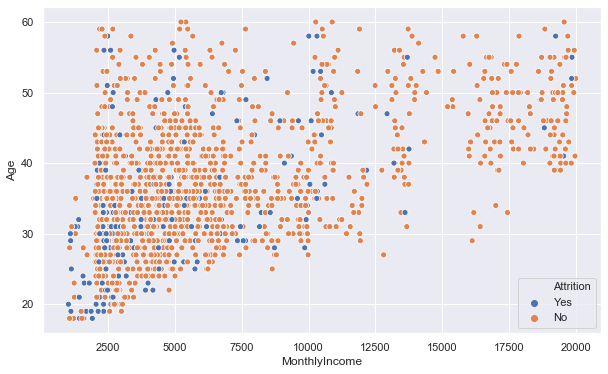

In [211]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'MonthlyIncome', y = 'Age', data = emp, hue = 'Attrition')

<Figure size 864x576 with 0 Axes>

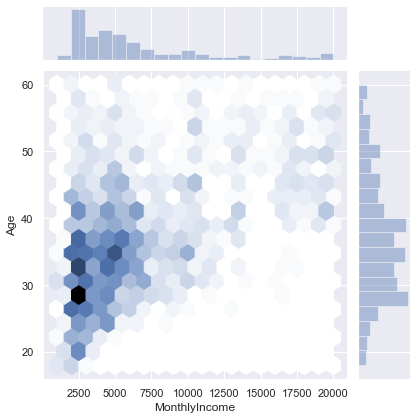

In [212]:
plt.figure(figsize = (12,8))
sns.jointplot(x = 'MonthlyIncome', y = 'Age', data = emp, kind = 'hexbin')

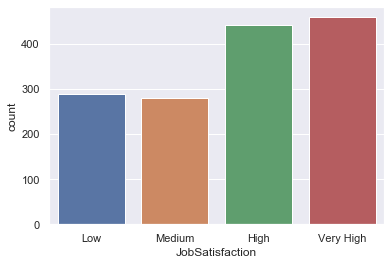

In [213]:
sat_order = ['Low', 'Medium', 'High', 'Very High']
sns.countplot(x = 'JobSatisfaction', data = emp, order = sat_order)

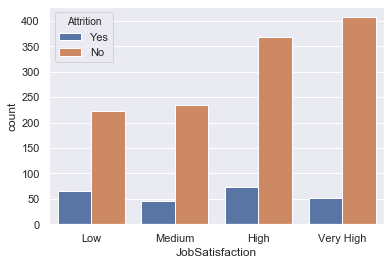

In [214]:
sat_order = ['Low', 'Medium', 'High', 'Very High']
sns.countplot(x = 'JobSatisfaction', data = emp, order = sat_order, hue = 'Attrition')

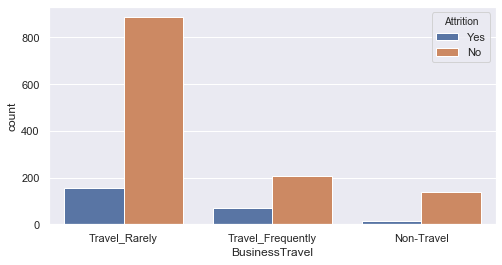

In [215]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'BusinessTravel', data = emp, hue = 'Attrition')

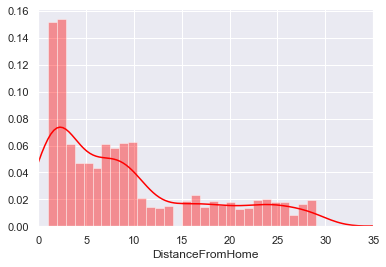

In [216]:
plt.xlim(0,35)
sns.distplot(emp['DistanceFromHome'], bins = 30, color = 'Red')

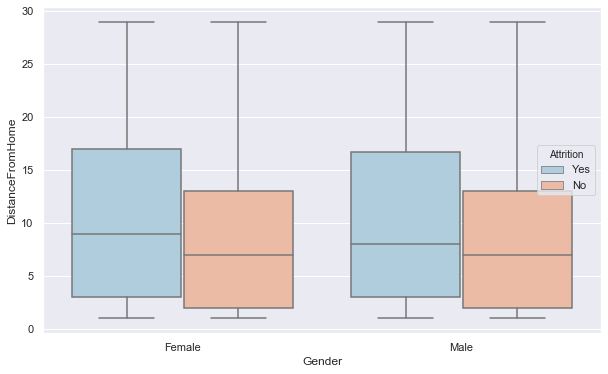

In [217]:
plt.figure(figsize = (10,6))
sns.boxplot(x = 'Gender', y = 'DistanceFromHome', data = emp, hue = 'Attrition', palette = 'RdBu_r')

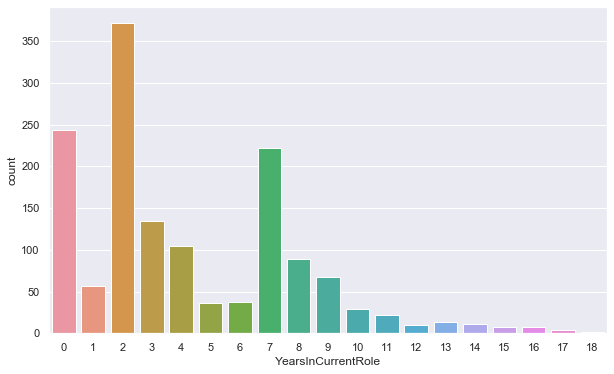

In [218]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'YearsInCurrentRole', data = emp)

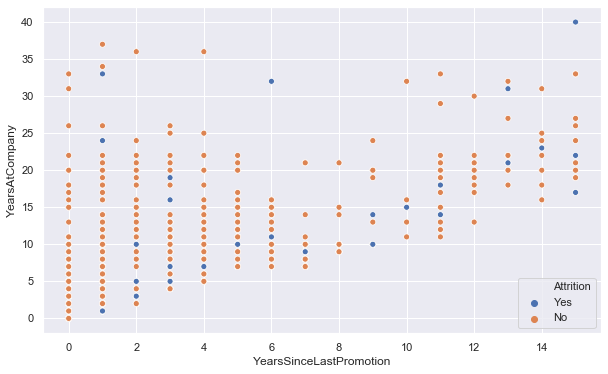

In [219]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'YearsSinceLastPromotion', y = 'YearsAtCompany', data = emp, hue = 'Attrition')

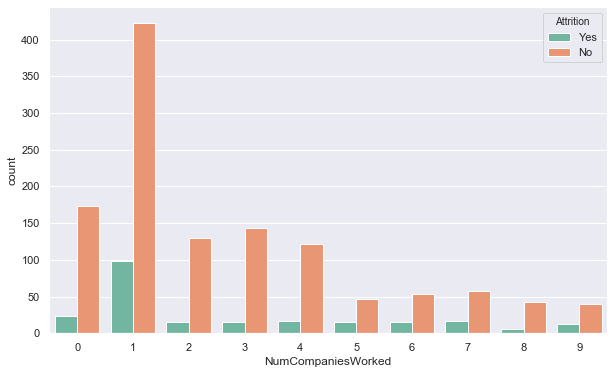

In [220]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'NumCompaniesWorked', data = emp, hue = 'Attrition', palette = 'Set2')

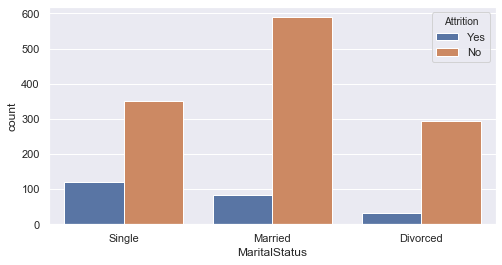

In [221]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'MaritalStatus', data = emp, hue = 'Attrition')

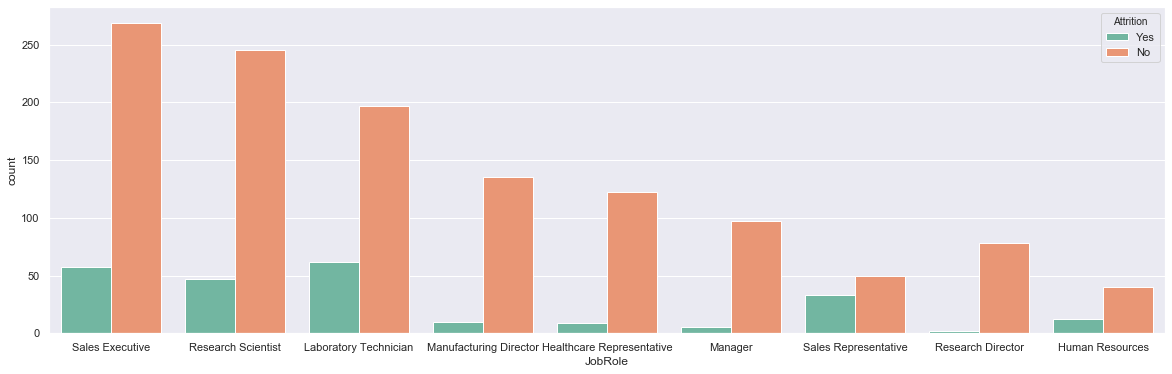

In [222]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'JobRole', data = emp, hue = 'Attrition', palette = 'Set2')

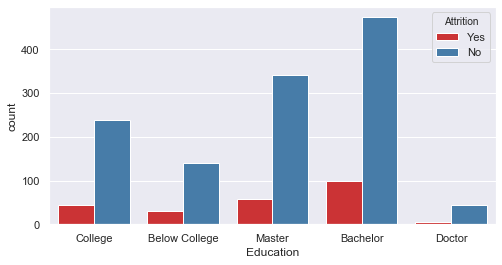

In [223]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'Education', data = emp, hue = 'Attrition', palette = 'Set1')

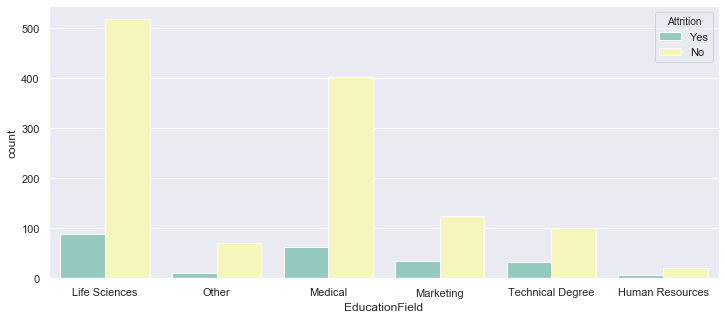

In [224]:
plt.figure(figsize = (12,5))
sns.countplot(x = 'EducationField', data = emp, hue = 'Attrition', palette = 'Set3')

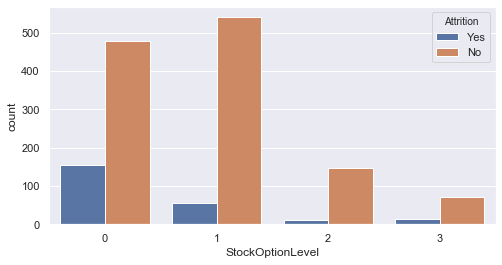

In [225]:
plt.figure(figsize = (8,4))
sns.countplot(x = 'StockOptionLevel', data = emp, hue = 'Attrition')

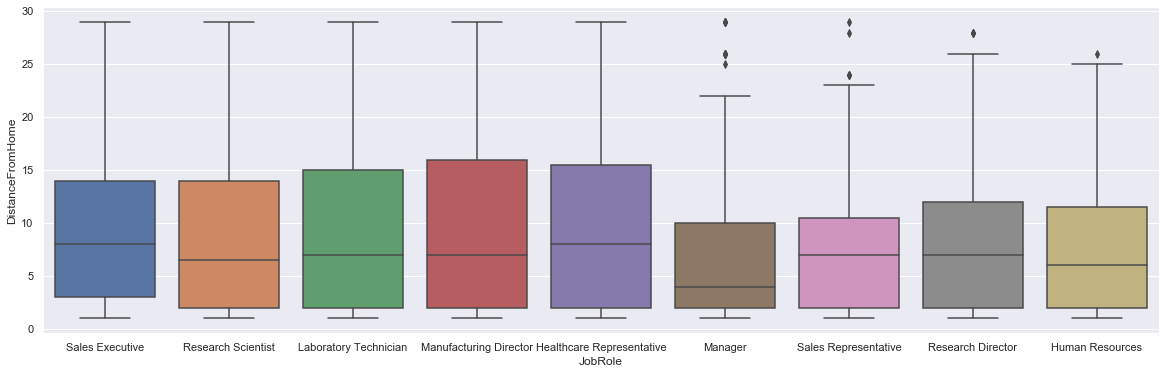

In [226]:
plt.figure(figsize = (20,6))
sns.boxplot(x = 'JobRole', y = 'DistanceFromHome', data = emp)

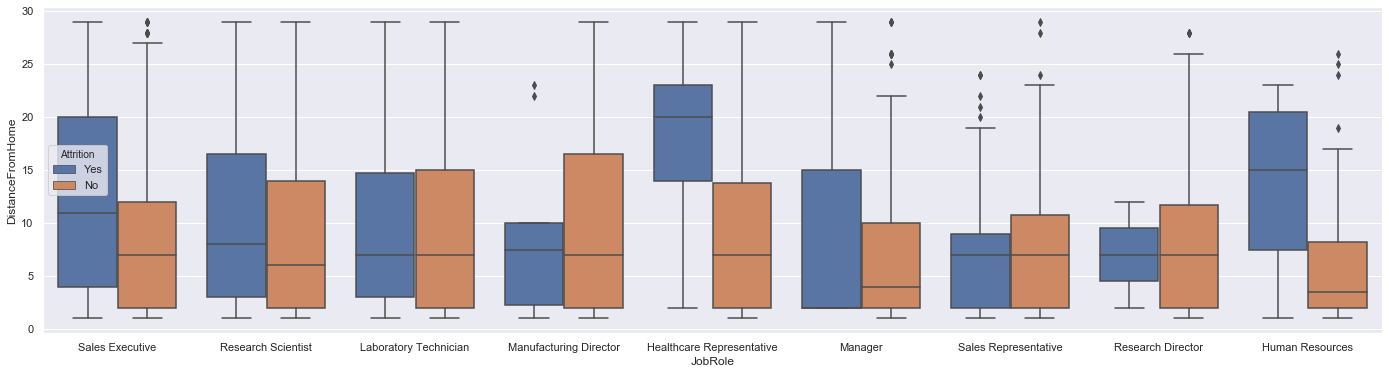

In [227]:
plt.figure(figsize = (24,6))
sns.boxplot(x = 'JobRole', y = 'DistanceFromHome', data = emp, hue = 'Attrition')

In [228]:
emp.drop(columns = ['Gender', 'JobRole'], axis = 1, inplace = True)

In [229]:
emp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,94,...,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,61,...,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,92,...,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,56,...,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,40,...,Excellent,Very High,1,6,3,Better,2,2,2,2


In [230]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null object
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null object
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null object
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1470 non-null object
PercentSalaryHike  

In [231]:
#Converting all the categorical variables in form of 0s and 1s using One-Hot Encoding
dummies = pd.get_dummies(emp[['BusinessTravel', 'Department', 'Education','EducationField', 'EnvironmentSatisfaction', 
                              'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
                              'PerformanceRating' , 'RelationshipSatisfaction', 'WorkLifeBalance']], drop_first = True)

emp = pd.concat([emp.drop(['BusinessTravel', 'Department', 'Education','EducationField', 'EnvironmentSatisfaction', 
                           'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
                           'PerformanceRating' , 'RelationshipSatisfaction', 'WorkLifeBalance'], axis = 1), dummies], axis = 1)

In [232]:
dummies1 = pd.get_dummies(emp['Attrition'], drop_first = True)

emp = pd.concat([emp.drop(['Attrition'], axis = 1), dummies1], axis = 1)

In [233]:
emp.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,Yes
0,41,1102,1,94,5993,19479,8,11,0,8,...,1,1,0,1,0,0,0,0,0,1
1,49,279,8,61,5130,24907,1,23,1,10,...,0,0,1,0,0,1,0,1,0,0
2,37,1373,2,92,2090,2396,6,15,0,7,...,1,1,0,0,1,0,0,1,0,1
3,33,1392,3,56,2909,23159,1,11,0,8,...,0,1,0,0,0,0,0,1,0,0
4,27,591,2,40,3468,16632,9,12,1,6,...,0,0,0,0,0,1,0,1,0,0


In [234]:
emp = emp.rename(columns = {'Yes' : 'Attrition'})

In [235]:
emp.corr()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,Attrition
Age,1.000000,0.010661,-0.001686,0.024287,0.497855,0.028051,0.299635,0.003634,0.037510,0.680381,...,-0.119185,0.028062,0.001904,-0.038526,-0.012322,0.050024,-0.013256,-0.010062,0.016048,-0.159205
DailyRate,0.010661,1.000000,-0.004985,0.023381,0.007707,-0.032182,0.038153,0.022704,0.042143,0.014515,...,-0.075835,0.009135,0.000473,-0.006383,0.012848,0.019082,-0.031592,-0.012570,0.034220,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.031131,-0.017014,0.027473,-0.029251,0.040235,0.044872,0.004628,...,-0.027445,0.025514,0.027110,-0.027543,0.037490,0.001628,-0.038609,0.013079,0.009075,0.077924
HourlyRate,0.024287,0.023381,0.031131,1.000000,-0.015794,-0.015297,0.022157,-0.009062,0.050263,-0.002334,...,-0.033436,-0.007782,-0.002172,-0.017483,0.042532,0.010950,-0.024264,0.012215,0.016638,-0.006846
MonthlyIncome,0.497855,0.007707,-0.017014,-0.015794,1.000000,0.034814,0.149515,-0.027269,0.005408,0.772893,...,-0.089361,0.006089,-0.017120,-0.033215,0.010183,0.013483,0.017629,0.007745,-0.004830,-0.159840
MonthlyRate,0.028051,-0.032182,0.027473,-0.015297,0.034814,1.000000,0.017521,-0.006429,-0.034323,0.026442,...,0.037260,0.021431,-0.009811,0.032862,-0.042983,0.008480,-0.017485,0.024285,-0.004903,0.015170
NumCompaniesWorked,0.299635,0.038153,-0.029251,0.022157,0.149515,0.017521,1.000000,-0.010238,0.030075,0.237639,...,-0.019161,-0.020786,-0.014095,-0.067193,0.012096,0.020655,0.035631,-0.037392,-0.004800,0.043494
PercentSalaryHike,0.003634,0.022704,0.040235,-0.009062,-0.027269,-0.006429,-0.010238,1.000000,0.007528,-0.020608,...,-0.001386,-0.005433,0.773550,0.033410,0.022759,-0.018577,-0.021346,0.032706,-0.034727,-0.013478
StockOptionLevel,0.037510,0.042143,0.044872,0.050263,0.005408,-0.034323,0.030075,0.007528,1.000000,0.010136,...,-0.638957,-0.000449,0.003506,0.026361,0.012744,-0.052517,-0.011673,-0.003161,0.039436,-0.137145
TotalWorkingYears,0.680381,0.014515,0.004628,-0.002334,0.772893,0.026442,0.237639,-0.020608,0.010136,1.000000,...,-0.089529,0.012754,0.006744,-0.022657,-0.003182,0.015401,0.001209,-0.008718,0.019174,-0.171063


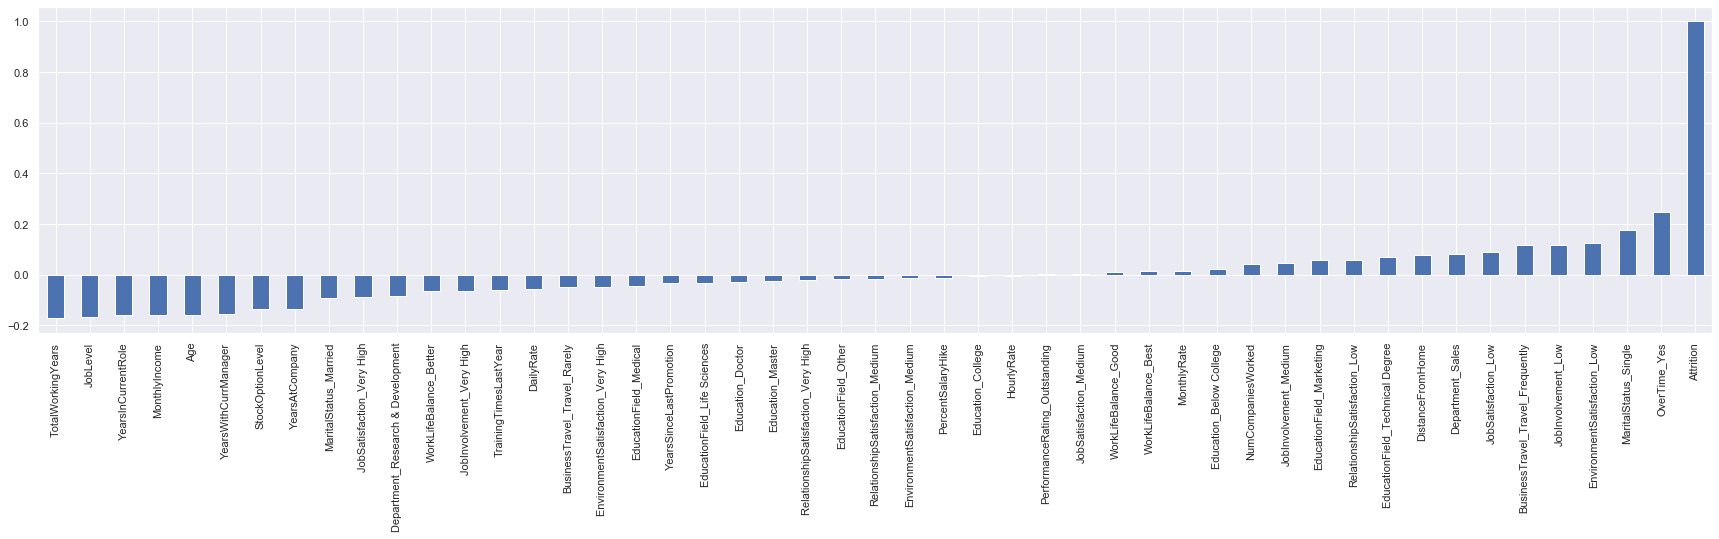

In [236]:
#plotting the correlation values of each column with respect to the Attrition column
plt.figure(figsize = (30,6))
emp.corr()['Attrition'].sort_values().plot(kind='bar')

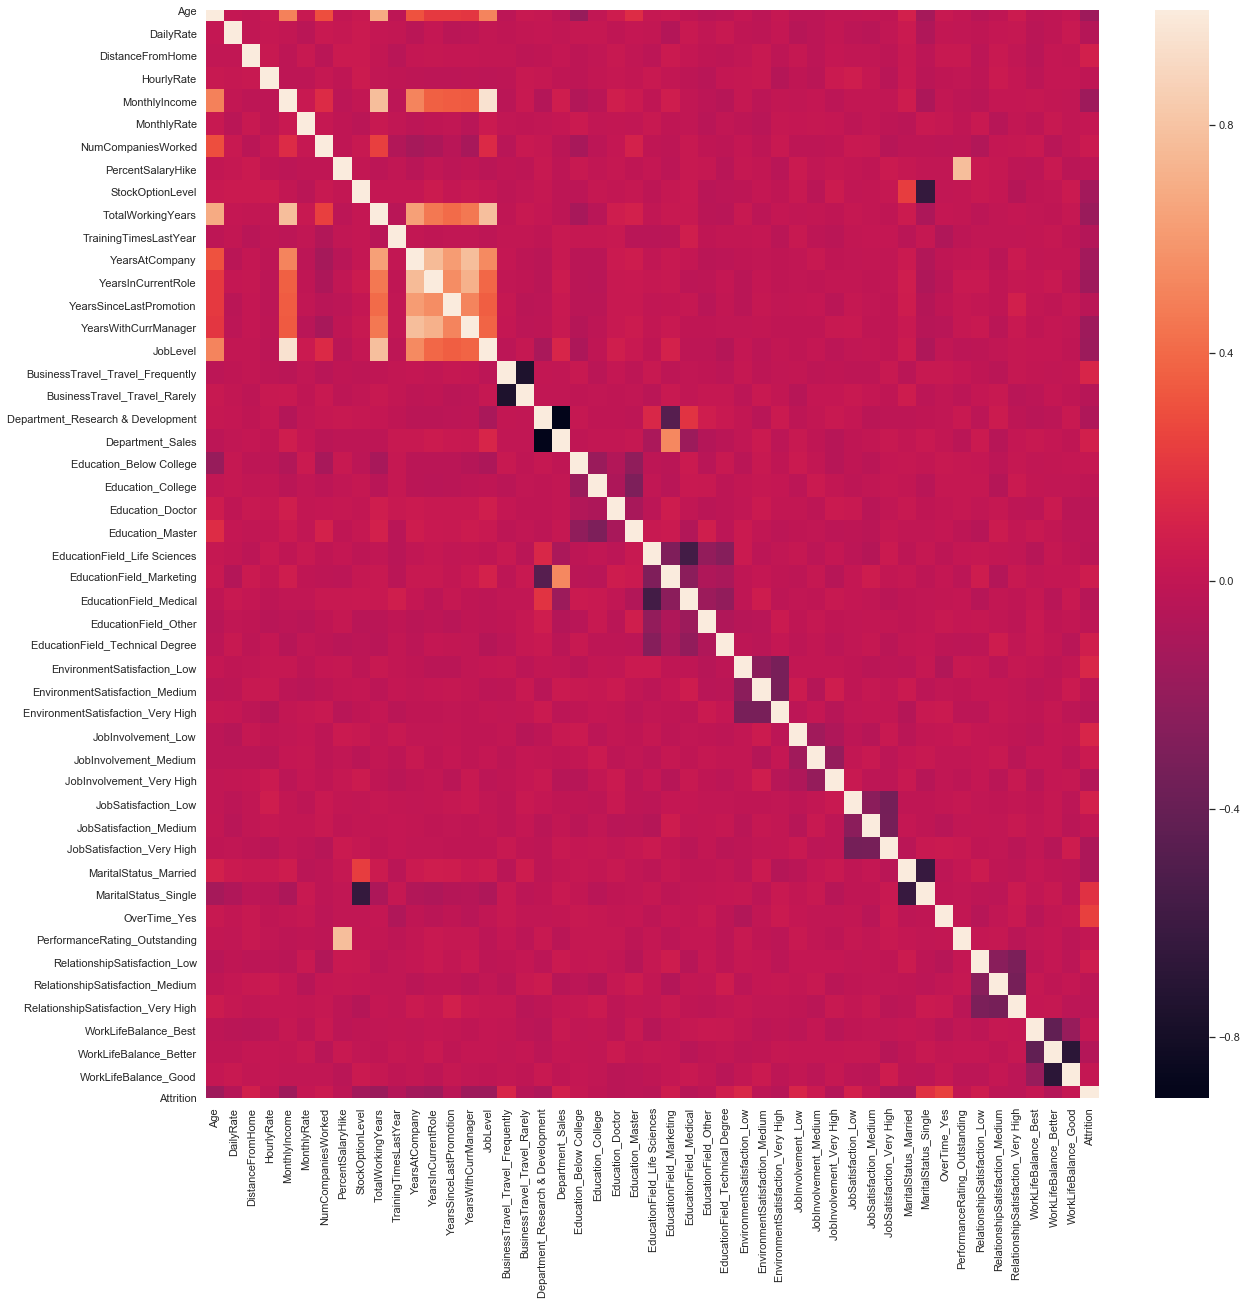

In [237]:
#checking the correlation using heatmaps
plt.figure(figsize = (20,20))
sns.heatmap(emp.corr())

# Machine Learning

In [238]:
#importing all the required libraries required for model prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

In [239]:
#Dividing the data into independent features and the dependent(target) feature
X = emp.drop('Attrition',axis=1).values
Y = emp['Attrition'].values

In [240]:
#Splitting the data into train and test data with a training data size of 80% and test data size of 20% of the total data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=101)

In [241]:
#Applying the Scaler function for Standardizing our data
scaler = MinMaxScaler()

#Applying fit and transform to the training data and only transform to the test data. 
#We do not fit the test data in order to prevent data leakage
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [242]:
X_train.shape

(1176, 48)

In [243]:
names = ['Logistic', 'LDA', 'DecisionTrees', 'NaiveBayes', 'KNN', 'GridSearchKNN', 'RandomForest', 'SVM', 'GridSearchSVM']
results = []

In [244]:
results

[]

Logistic Regression

In [245]:
log = LogisticRegression()

log.fit(X_train, Y_train)
predicted = log.predict(X_test)

result = log.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

results.append(result*100.0)

Accuracy: 87.075%
[[239  10]
 [ 28  17]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       249
           1       0.63      0.38      0.47        45

    accuracy                           0.87       294
   macro avg       0.76      0.67      0.70       294
weighted avg       0.85      0.87      0.86       294



C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Linear Discriminant Analysis

In [246]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, Y_train)
predicted = lda.predict(X_test)

result = lda.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

results.append(result*100.0)

Accuracy: 85.374%
[[236  13]
 [ 30  15]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       249
           1       0.54      0.33      0.41        45

    accuracy                           0.85       294
   macro avg       0.71      0.64      0.66       294
weighted avg       0.83      0.85      0.84       294



Decision Tree

In [247]:
dtc = DecisionTreeClassifier()

dtc.fit(X_train, Y_train)
predicted = dtc.predict(X_test)

result = dtc.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

results.append(result*100.0)

Accuracy: 77.551%
[[216  33]
 [ 33  12]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       249
           1       0.27      0.27      0.27        45

    accuracy                           0.78       294
   macro avg       0.57      0.57      0.57       294
weighted avg       0.78      0.78      0.78       294



Naive Bayes

In [248]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)
rfc_pred = gnb.predict(X_test)

result = gnb.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, rfc_pred))
print(classification_report(Y_test, rfc_pred))

results.append(result*100.0)

Accuracy: 77.551%
[[201  48]
 [ 18  27]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       249
           1       0.36      0.60      0.45        45

    accuracy                           0.78       294
   macro avg       0.64      0.70      0.65       294
weighted avg       0.83      0.78      0.80       294



K Nearest Neighbors

In [249]:
knn = KNeighborsClassifier(n_neighbors = 20)

knn.fit(X_train, Y_train)
predicted = knn.predict(X_test)

result = knn.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

results.append(result*100.0)

Accuracy: 84.694%
[[249   0]
 [ 45   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       249
           1       0.00      0.00      0.00        45

    accuracy                           0.85       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294



C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSearchCV on KNN

In [250]:
#Using GridSearchCV checking and using the best k-value for the model
param_grid = {'n_neighbors' : [i for i in range(1,29,2)]}
grid_KNN = GridSearchCV(KNeighborsClassifier(), param_grid, verbose = 3)
grid_KNN.fit(X_train, Y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.747, total=   0.1s
[CV] n_neighbors=1 ...................................................


C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... n_neighbors=1, score=0.776, total=   0.1s
[CV] n_neighbors=1 ...................................................
[CV] ....................... n_neighbors=1, score=0.793, total=   0.1s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.806, total=   0.1s
[CV] n_neighbors=3 ...................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... n_neighbors=3, score=0.834, total=   0.1s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.839, total=   0.1s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.827, total=   0.1s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.842, total=   0.1s
[CV] n_neighbors=5 ...................................................
[CV] ....................... n_neighbors=5, score=0.842, total=   0.1s
[CV] n_neighbors=7 ...................................................
[CV] ....................... n_neighbors=7, score=0.829, total=   0.1s
[CV] n_neighbors=7 ...................................................
[CV] ....................... n_neighbors=7, score=0.842, total=   0.1s
[CV] n_neighbors=7 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    3.7s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25, 27]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [251]:
print(grid_KNN.best_params_)
print(grid_KNN.best_estimator_)

grid_KNN_predictions = grid_KNN.predict(X_test)
print(classification_report(Y_test, grid_KNN_predictions))
print(confusion_matrix(Y_test, grid_KNN_predictions))
result = grid_KNN.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

results.append(result*100.0)

{'n_neighbors': 15}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       249
           1       1.00      0.04      0.09        45

    accuracy                           0.85       294
   macro avg       0.93      0.52      0.50       294
weighted avg       0.88      0.85      0.79       294

[[249   0]
 [ 43   2]]
Accuracy: 85.374%


Random Forest

In [252]:
rfc = RandomForestClassifier(n_estimators = 200)

rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

result = rfc.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, rfc_pred))
print(classification_report(Y_test, rfc_pred))

results.append(result*100.0)

Accuracy: 86.395%
[[247   2]
 [ 38   7]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       249
           1       0.78      0.16      0.26        45

    accuracy                           0.86       294
   macro avg       0.82      0.57      0.59       294
weighted avg       0.85      0.86      0.82       294



Support Vector Machines

In [253]:
svc = SVC()

svc.fit(X_train, Y_train)
predicted = svc.predict(X_test)

result = svc.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))
print(confusion_matrix(Y_test, predicted))
print(classification_report(Y_test, predicted))

results.append(result*100.0)

Accuracy: 84.694%
[[249   0]
 [ 45   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       249
           1       0.00      0.00      0.00        45

    accuracy                           0.85       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.72      0.85      0.78       294



C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GridSeachCV on SVM

In [254]:
#Using GridSearchCV checking the best and optimal values for C and gamma
param_grid = {'C' : [0.1,1,10,100,1000], 'gamma' : [1,0.1,0.01,0.001,0.0001]}
grid_SVM = GridSearchCV(SVC(), param_grid, verbose = 3)
grid_SVM.fit(X_train, Y_train)

C:\Users\GA336773\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.837, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.837, total=   0.2s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.837, total=   0.2s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.837, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.837, total=   0.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.837, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.837, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.837, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .

[CV] ..................... C=1000, gamma=1, score=0.837, total=   0.2s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.837, total=   0.2s
[CV] C=1000, gamma=1 .................................................
[CV] ..................... C=1000, gamma=1, score=0.837, total=   0.2s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.832, total=   0.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.870, total=   0.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.844, total=   0.1s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.821, total=   0.2s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    8.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [255]:
print(grid_SVM.best_params_)
print(grid_SVM.best_estimator_)
grid_SVM_predictions = grid_SVM.predict(X_test)

print(classification_report(Y_test, grid_SVM_predictions))
print(confusion_matrix(Y_test, grid_SVM_predictions))
result = grid_SVM.score(X_test, Y_test)
print("Accuracy: %.3f%%" % (result*100.0))

results.append(result*100.0)

{'C': 1000, 'gamma': 0.001}
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       249
           1       0.78      0.40      0.53        45

    accuracy                           0.89       294
   macro avg       0.84      0.69      0.73       294
weighted avg       0.88      0.89      0.88       294

[[244   5]
 [ 27  18]]
Accuracy: 89.116%


In [256]:
#Post adjusting the hyperparameters and chossing the best values, SVM model provide us the best results among all the 
#models created with an accuracy of 89%. Also since the target variable is unbalanced (ratio of yes and no is uneven), 
#hence we would also need to consider the Precision, Recall and F1-score values for Yes predictions.

In [257]:
grid_SVM.predict(X_test[0:10])

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [258]:
Y_test[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [259]:
print("Algorithms:", names)
print("Accuracy:", results)

Algorithms: ['Logistic', 'LDA', 'DecisionTrees', 'NaiveBayes', 'KNN', 'GridSearchKNN', 'RandomForest', 'SVM', 'GridSearchSVM']
Accuracy: [87.07482993197279, 85.37414965986395, 77.55102040816327, 77.55102040816327, 84.6938775510204, 85.37414965986395, 86.39455782312925, 84.6938775510204, 89.1156462585034]


In [260]:
data_tuples = list(zip(names, results))

In [261]:
data_tuples

[('Logistic', 87.07482993197279),
 ('LDA', 85.37414965986395),
 ('DecisionTrees', 77.55102040816327),
 ('NaiveBayes', 77.55102040816327),
 ('KNN', 84.6938775510204),
 ('GridSearchKNN', 85.37414965986395),
 ('RandomForest', 86.39455782312925),
 ('SVM', 84.6938775510204),
 ('GridSearchSVM', 89.1156462585034)]

In [262]:
algo_cmpr = pd.DataFrame(data_tuples, columns = ['Names', 'Results'])

In [263]:
algo_cmpr

,Names,Results
0,Logistic,87.074830
1,LDA,85.374150
2,DecisionTrees,77.551020
3,NaiveBayes,77.551020
4,KNN,84.693878
5,GridSearchKNN,85.374150
6,RandomForest,86.394558
7,SVM,84.693878
8,GridSearchSVM,89.115646


(70, 90)

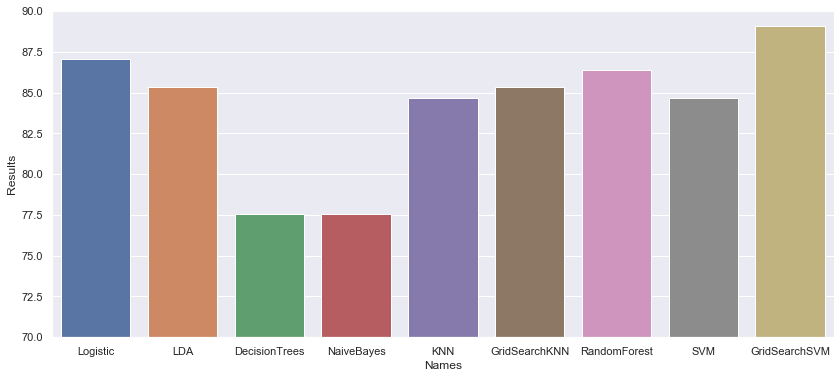

In [264]:
plt.figure(figsize = (14,6))
sns.barplot(x = 'Names', y = 'Results', data = algo_cmpr)
plt.ylim(70,90)

# Artificial Neural Nets

In [265]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [266]:
X_train.shape

(1176, 48)

In [293]:
model = Sequential()

model.add(Dense(units=48,activation='relu'))

model.add(Dense(units=24,activation='relu'))

model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [294]:
model.fit(x=X_train, y=Y_train, epochs=250, validation_data=(X_test, Y_test), verbose=1)

Train on 1176 samples, validate on 294 samples
Epoch 1/250
1176/1176 [==============================] - 1s 1ms/sample - loss: 0.4924 - val_loss: 0.4108
Epoch 2/250
1176/1176 [==============================] - 0s 196us/sample - loss: 0.4144 - val_loss: 0.3911
Epoch 3/250
1176/1176 [==============================] - 0s 161us/sample - loss: 0.3938 - val_loss: 0.3739
Epoch 4/250
1176/1176 [==============================] - 1s 1ms/sample - loss: 0.3747 - val_loss: 0.3538
Epoch 5/250
1176/1176 [==============================] - 1s 743us/sample - loss: 0.3552 - val_loss: 0.3418
Epoch 6/250
1176/1176 [==============================] - 0s 296us/sample - loss: 0.3400 - val_loss: 0.3316
Epoch 7/250
1176/1176 [==============================] - 0s 225us/sample - loss: 0.3258 - val_loss: 0.3284
Epoch 8/250
1176/1176 [==============================] - 0s 212us/sample - loss: 0.3144 - val_loss: 0.3190
Epoch 9/250
1176/1176 [==============================] - 0s 359us/sample - loss: 0.3025 - val_loss: 0

1176/1176 [==============================] - 0s 110us/sample - loss: 3.7584e-04 - val_loss: 1.2789
Epoch 151/250
1176/1176 [==============================] - 0s 109us/sample - loss: 3.6967e-04 - val_loss: 1.2843
Epoch 152/250
1176/1176 [==============================] - 0s 126us/sample - loss: 3.5656e-04 - val_loss: 1.2945
Epoch 153/250
1176/1176 [==============================] - 0s 126us/sample - loss: 3.5465e-04 - val_loss: 1.2932
Epoch 154/250
1176/1176 [==============================] - 0s 133us/sample - loss: 3.3280e-04 - val_loss: 1.3021
Epoch 155/250
1176/1176 [==============================] - 0s 129us/sample - loss: 3.3447e-04 - val_loss: 1.3043
Epoch 156/250
1176/1176 [==============================] - 0s 136us/sample - loss: 3.2304e-04 - val_loss: 1.3034
Epoch 157/250
1176/1176 [==============================] - 0s 136us/sample - loss: 3.1380e-04 - val_loss: 1.3151
Epoch 158/250
1176/1176 [==============================] - 0s 124us/sample - loss: 3.0662e-04 - val_loss: 1.31

In [295]:
model_loss = pd.DataFrame(model.history.history)

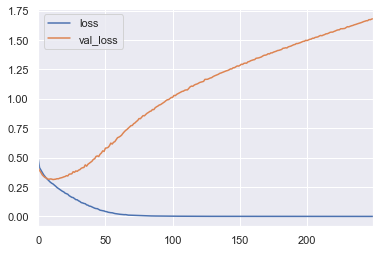

In [296]:
model_loss.plot()

In [297]:
model = Sequential()
model.add(Dense(units = 48, activation = 'relu'))
model.add(Dense(units = 24, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [298]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [299]:
model.fit(x=X_train, y=Y_train, epochs=250, validation_data=(X_test, Y_test), verbose=1, callbacks=[early_stop] )

Train on 1176 samples, validate on 294 samples
Epoch 1/250
1176/1176 [==============================] - 1s 961us/sample - loss: 0.5776 - val_loss: 0.4397
Epoch 2/250
1176/1176 [==============================] - 0s 114us/sample - loss: 0.4263 - val_loss: 0.4094
Epoch 3/250
1176/1176 [==============================] - 0s 131us/sample - loss: 0.3980 - val_loss: 0.3870
Epoch 4/250
1176/1176 [==============================] - 0s 112us/sample - loss: 0.3773 - val_loss: 0.3676
Epoch 5/250
1176/1176 [==============================] - 0s 113us/sample - loss: 0.3600 - val_loss: 0.3529
Epoch 6/250
1176/1176 [==============================] - 0s 113us/sample - loss: 0.3447 - val_loss: 0.3384
Epoch 7/250
1176/1176 [==============================] - 0s 109us/sample - loss: 0.3301 - val_loss: 0.3288
Epoch 8/250
1176/1176 [==============================] - 0s 114us/sample - loss: 0.3159 - val_loss: 0.3198
Epoch 9/250
1176/1176 [==============================] - 0s 113us/sample - loss: 0.3065 - val_los

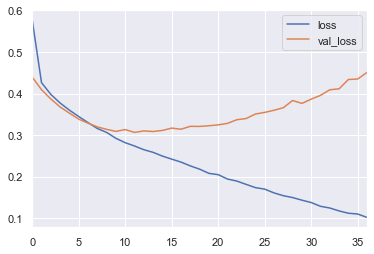

In [300]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [301]:
model = Sequential()
model.add(Dense(units = 48, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 24, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [302]:
model.fit(x=X_train, y=Y_train,  epochs=250, validation_data=(X_test, Y_test), verbose=1, callbacks=[early_stop] )

Train on 1176 samples, validate on 294 samples
Epoch 1/250
1176/1176 [==============================] - 1s 1ms/sample - loss: 0.5529 - val_loss: 0.4255
Epoch 2/250
1176/1176 [==============================] - 0s 148us/sample - loss: 0.4978 - val_loss: 0.4069
Epoch 3/250
1176/1176 [==============================] - 0s 125us/sample - loss: 0.4728 - val_loss: 0.3966
Epoch 4/250
1176/1176 [==============================] - 0s 124us/sample - loss: 0.4489 - val_loss: 0.3895
Epoch 5/250
1176/1176 [==============================] - 0s 126us/sample - loss: 0.4416 - val_loss: 0.3806
Epoch 6/250
1176/1176 [==============================] - 0s 122us/sample - loss: 0.4296 - val_loss: 0.3784
Epoch 7/250
1176/1176 [==============================] - 0s 131us/sample - loss: 0.4261 - val_loss: 0.3734
Epoch 8/250
1176/1176 [==============================] - 0s 127us/sample - loss: 0.4266 - val_loss: 0.3671
Epoch 9/250
1176/1176 [==============================] - 0s 125us/sample - loss: 0.4164 - val_loss:

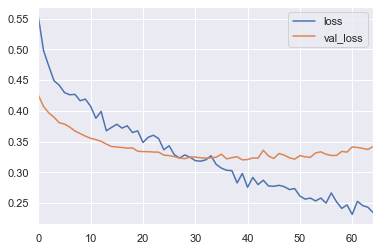

In [303]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [304]:
predictions = model.predict_classes(X_test)

In [305]:
print(classification_report(Y_test,predictions))
print(confusion_matrix(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       249
           1       0.66      0.42      0.51        45

    accuracy                           0.88       294
   macro avg       0.78      0.69      0.72       294
weighted avg       0.86      0.88      0.87       294

[[239  10]
 [ 26  19]]
